In [3]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics 
from tensorflow.keras.datasets import mnist
import numpy as np

In [4]:
# 하이퍼 파라미터 설정하기

batch_size = 100     
original_dim = 784  # 28 x 28 이미지 가로 세로
latent_dim = 2 #출력 차원
intermediate_dim = 256 # 교차층 차원
epochs = 50 # 에포크
epsilon_std = 1.0

In [6]:
def sampling(args: tuple):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var/ 2 )*epsilon

In [12]:
# make encoder
x = Input(shape=(original_dim,), name="input")
h = Dense(intermediate_dim, activation='relu', name="encoding")(x)
z_mean = Dense(latent_dim, name="mean")(h)
z_log_var = Dense(latent_dim, name="log-variance")(h)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = Model(x, [z_mean, z_log_var, z], name="encoder")

# make decoder
input_decoder = Input(shape=(latent_dim,), name="decoder_input")
decoder_h = Dense(intermediate_dim, activation='relu', name='decoder_h')(input_decoder)
x_decoded = Dense(original_dim, activation='sigmoid', name='flat_decoded')(decoder_h)
decoder = Model(input_decoder, x_decoded, name="decoder")


In [13]:
output_combined = decoder(encoder(x)[2])
vae = Model(x, output_combined)
vae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 encoder (Functional)        [(None, 2),               201988    
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 784)               202256    
                                                                 
Total params: 404,244
Trainable params: 404,244
Non-trainable params: 0
_________________________________________________________________


In [14]:
kl_loss = -0.5 * K.sum(
    1+z_log_var -K.exp(z_log_var) - K.square(z_mean), axis= -1
)
vae.add_loss(K.mean(kl_loss)/784.)
vae.compile(optimizer='rmsprop', loss="binary_crossentropy")

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))


In [18]:
vae.fit(x_train, x_train, shuffle=True, epochs=epochs, batch_size = batch_size)

Epoch 1/50


2024-01-28 15:37:40.169450: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-01-28 15:37:40.457596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x100x1x784xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must

600/600 [==============================] - 12s 10ms/step - loss: 0.2450
Epoch 2/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2168
Epoch 3/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2126
Epoch 4/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2098
Epoch 5/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2077
Epoch 6/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2060
Epoch 7/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2046
Epoch 8/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2033
Epoch 9/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2021
Epoch 10/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2010
Epoch 11/50
600/600 [==============================] - 6s 10ms/step - loss: 0.2001
Epoch 12/50
600/600 [==============================] - 6s 10ms/step - loss: 0.1993
Epoch 13/50
600/600 [==

2024-01-28 15:44:31.341067: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 0s 1ms/step


/Users/parkminseo/miniconda3/envs/tensorflow_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkminseo/miniconda3/envs/tensorflow_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkminseo/miniconda3/envs/tensorflow_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkminseo/miniconda3/envs/tensorflow_env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/parkminseo/miniconda3/envs/tensorflow_env/lib/python3.8/site-packages/IPytho

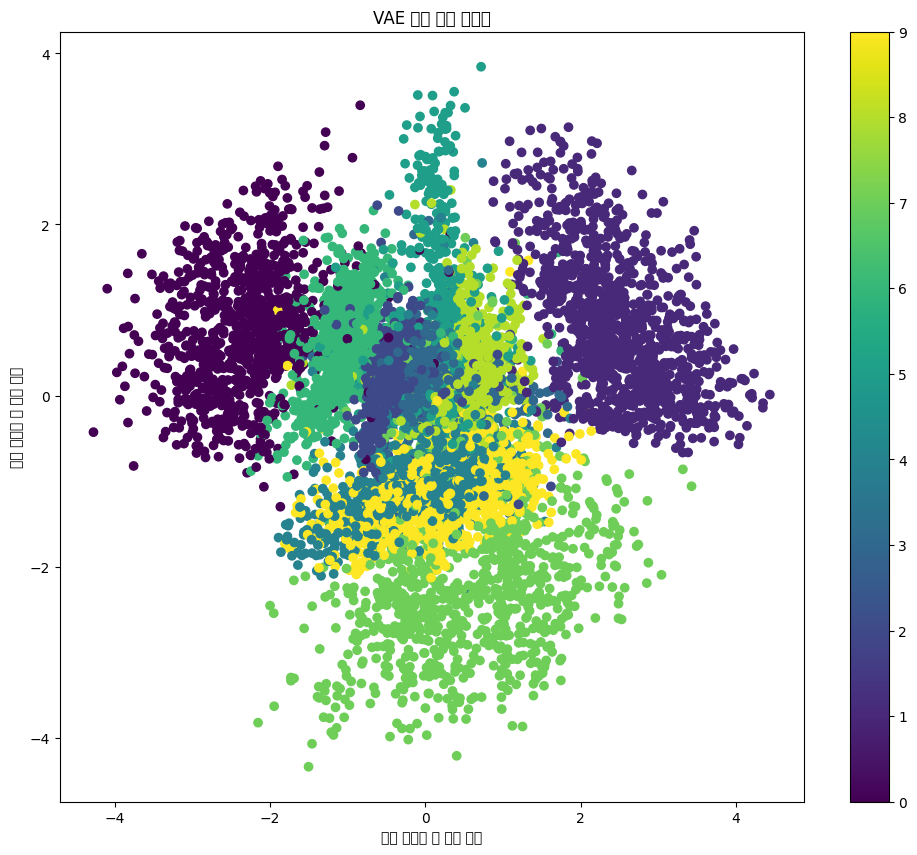

In [19]:
import matplotlib.pyplot as plt


# 잠재 공간의 표현을 얻기 위해 인코더를 사용
z_mean, _, _ = encoder.predict(x_test, batch_size=batch_size)

# 잠재 공간 시각화
plt.figure(figsize=(12, 10))
plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
plt.colorbar()
plt.xlabel("잠재 공간의 첫 번째 차원")
plt.ylabel("잠재 공간의 두 번째 차원")
plt.title("VAE 잠재 공간 시각화")
plt.show()


[[-1.64485363 -1.64485363]]


2024-01-28 15:46:09.327680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 322ms/step
[[-1.20404696 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.92082298 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.69714143 -1.64485363]]
1/1 [==============================] - 0s 7ms/step
[[-0.50396537 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.32807211 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.16184417 -1.64485363]]
1/1 [==============================] - 0s 7ms/step
[[-1.39145821e-16 -1.64485363e+00]]
1/1 [==============================] - 0s 6ms/step
[[ 0.16184417 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[ 0.32807211 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[ 0.50396537 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[ 0.69714143 -1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[ 0.92082298 -1.64485363]]
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 6ms/step
[[ 1.64485363 -0.16184417]]
1/1 [==============================] - 0s 5ms/step
[[-1.64485363e+00 -1.39145821e-16]]
1/1 [==============================] - 0s 6ms/step
[[-1.20404696e+00 -1.39145821e-16]]
1/1 [==============================] - 0s 5ms/step
[[-9.20822976e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 6ms/step
[[-6.97141435e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 6ms/step
[[-5.03965367e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 6ms/step
[[-3.28072108e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 5ms/step
[[-1.61844167e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 5ms/step
[[-1.39145821e-16 -1.39145821e-16]]
1/1 [==============================] - 0s 6ms/step
[[ 1.61844167e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 6ms/step
[[ 3.28072108e-01 -1.39145821e-16]]
1/1 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 6ms/step
[[0.69714143 1.20404696]]
1/1 [==============================] - 0s 6ms/step
[[0.92082298 1.20404696]]
1/1 [==============================] - 0s 6ms/step
[[1.20404696 1.20404696]]
1/1 [==============================] - 0s 6ms/step
[[1.64485363 1.20404696]]
1/1 [==============================] - 0s 5ms/step
[[-1.64485363  1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-1.20404696  1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.92082298  1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.69714143  1.64485363]]
1/1 [==============================] - 0s 5ms/step
[[-0.50396537  1.64485363]]
1/1 [==============================] - 0s 5ms/step
[[-0.32807211  1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-0.16184417  1.64485363]]
1/1 [==============================] - 0s 6ms/step
[[-1.39145821e-16  1.64485363e+00]]
1/1 [==============================] - 0s 5ms/step
[

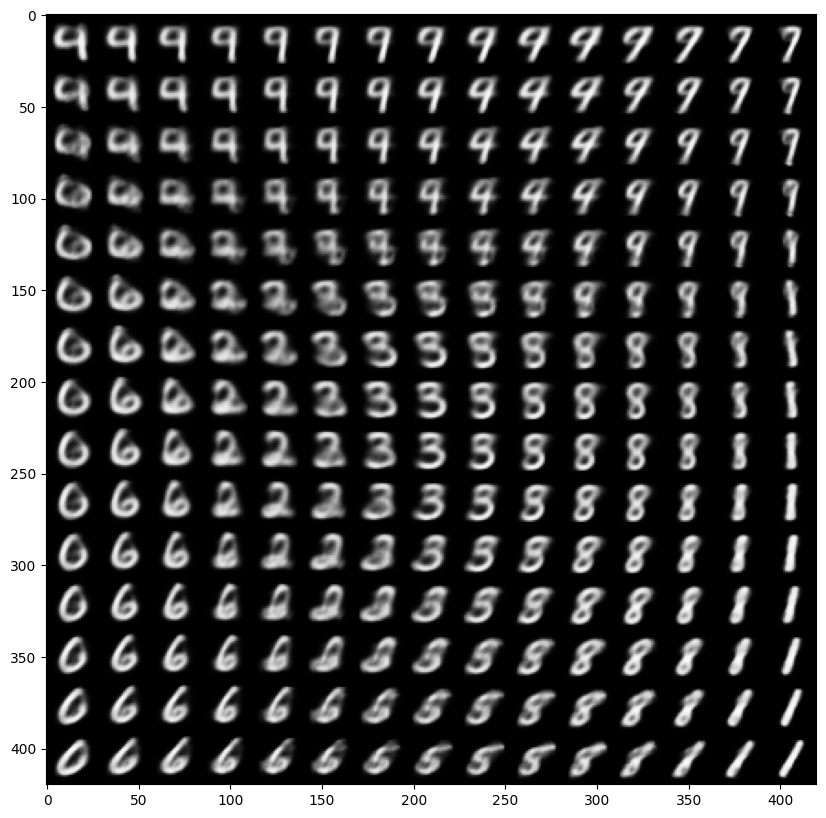

In [21]:
from scipy.stats import norm

# 숫자의 2D 매니폴드 출력하기
n = 15  # 15x15 숫자를 담은 그림
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# 잠재 공간을 가우스 분포로 가정했기 때문에 잠재 변수 z의 값을 만들기 위해
# 일정 간격으로 떨어진 좌표를 가우스 분포의 역 CDF(ppf)를 통해 변환합니다.
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        print(z_sample)
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()